<a href="https://colab.research.google.com/github/nguyetvo/2019-Kaggle-ML-DS-Survey/blob/master/Aspiring_Data_Scientist_Guide_tools%2C_products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import division
import numpy as np 
import pandas as pd 
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.tools as tls

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
os.environ['KAGGLE_USERNAME'] = "nguyetvo" 
os.environ['KAGGLE_KEY'] = "1f34732ea5c843e829d5230feff0e412"

In [3]:
!kaggle --version

Kaggle API 1.5.4


In [4]:
!kaggle competitions download -c kaggle-survey-2019

  0% 0.00/862k [00:00<?, ?B/s]
100% 862k/862k [00:00<00:00, 59.3MB/s]
  0% 0.00/3.54k [00:00<?, ?B/s]
100% 3.54k/3.54k [00:00<00:00, 3.32MB/s]
  0% 0.00/1.65M [00:00<?, ?B/s]
100% 1.65M/1.65M [00:00<00:00, 106MB/s]
  0% 0.00/5.67k [00:00<?, ?B/s]
100% 5.67k/5.67k [00:00<00:00, 5.87MB/s]


In [5]:
!unzip multiple_choice_responses.csv.zip

Archive:  multiple_choice_responses.csv.zip
  inflating: multiple_choice_responses.csv  


In [6]:
data = pd.read_csv('/content/multiple_choice_responses.csv', encoding = "utf-8")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0,3,7,19,34,47,49,50,51,52,53,54,68,81,94,96,109,115,130,139,147,154,167,180,193,206,219,232,245) have mixed types.Specify dtype option on import or set low_memory=False.



In [0]:
data = data.drop(['Q2_OTHER_TEXT', 'Q5_OTHER_TEXT', 'Q9_OTHER_TEXT', 'Q13_OTHER_TEXT', 'Q14_Part_1_TEXT', 'Q14_Part_2_TEXT', 'Q14_Part_3_TEXT', 'Q14_Part_4_TEXT', 
           'Q14_Part_5_TEXT', 'Q14_OTHER_TEXT', 'Q17_OTHER_TEXT', 'Q18_OTHER_TEXT', 
          'Q19_OTHER_TEXT', 'Q20_OTHER_TEXT', 'Q21_OTHER_TEXT', 'Q24_OTHER_TEXT',
          'Q25_OTHER_TEXT', 'Q26_OTHER_TEXT', 'Q27_OTHER_TEXT', 'Q28_OTHER_TEXT', 'Q29_OTHER_TEXT',
          'Q30_OTHER_TEXT', 'Q31_OTHER_TEXT', 'Q32_OTHER_TEXT', 'Q33_OTHER_TEXT', 
          'Q34_OTHER_TEXT'], axis=1)

In [8]:
data.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,...,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,What is your current yearly compensation (appr...,Approximately how much money have you spent on...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Which specific big data / analytics products d...,Which specific big data / analytics products d...,Which specific big data / analytics products d...,Which specific big data / analytics products d...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated mach

**Age distribution between Kaggle users**

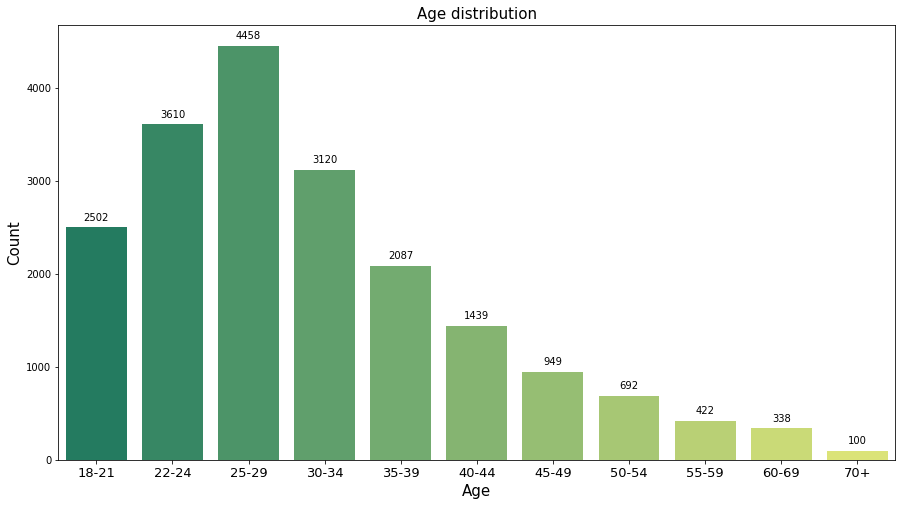

In [9]:
plt.figure(figsize=(15,8))
vis1 = sns.countplot(data['Q1'].iloc[1:].sort_values(ascending=True), palette='summer')
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=0, size=13)
plt.title('Age distribution', fontsize=15)

for p in vis1.patches:
    vis1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Gender distribution**

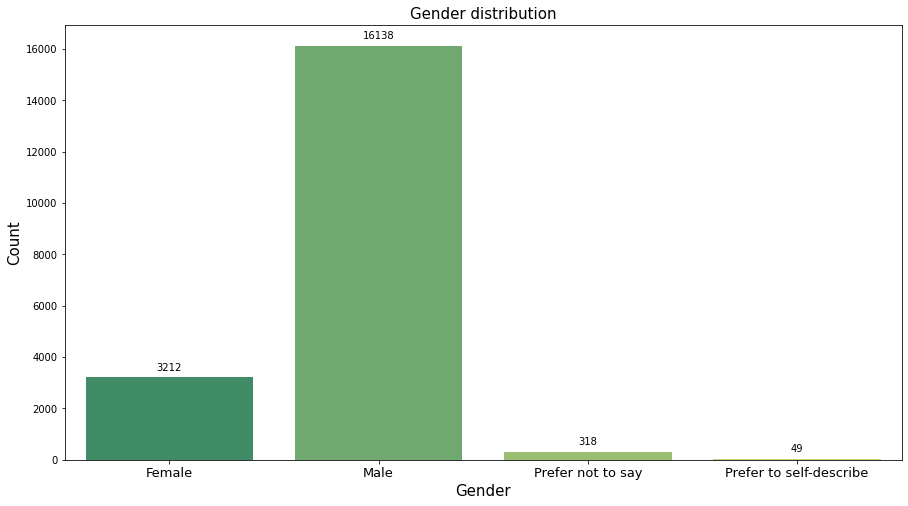

In [10]:
plt.figure(figsize=(15,8))
vis2 = sns.countplot(data['Q2'].iloc[1:].sort_values(ascending=True), palette='summer')
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=0, size=13)
plt.title('Gender distribution', fontsize=15)

for p in vis2.patches:
    vis2.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [11]:
male_count = len(data[data['Q2'] == 'Male'])
female_count = len(data[data['Q2'] == 'Female'])

print('Percentage of female: {:.2f} %' .format(female_count/len(data['Q2'].iloc[1:])*100))
print('Percentage of male: {:.2f} %' .format(male_count/len(data['Q2'].iloc[1:])*100))

Percentage of female: 16.29 %
Percentage of male: 81.85 %


**Country distribution**

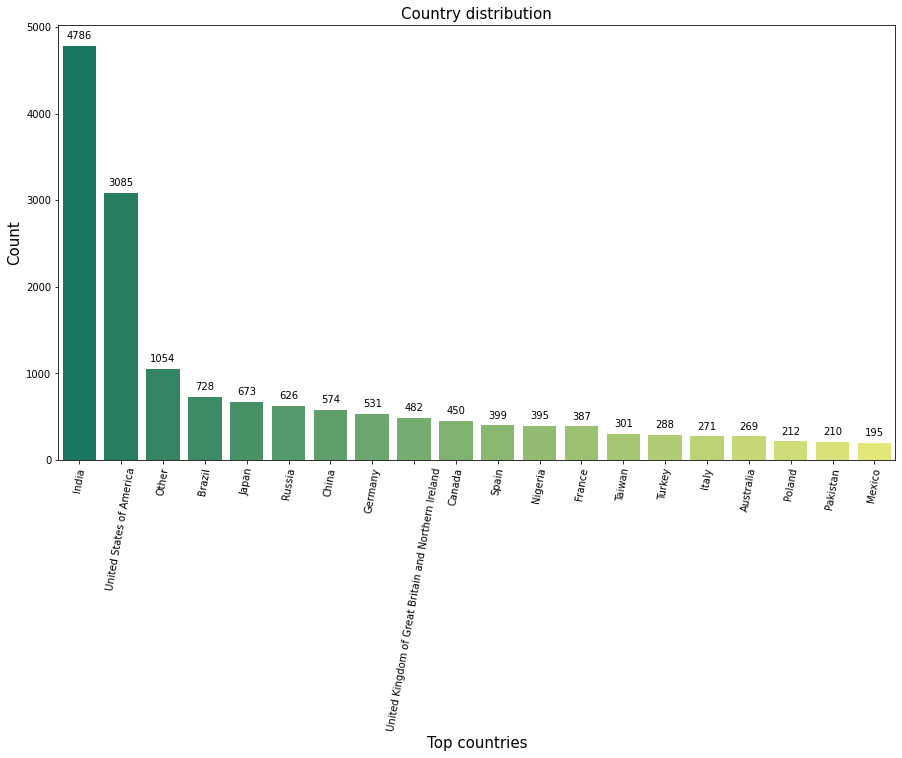

In [12]:
plt.figure(figsize=(15,8))
data1 = pd.DataFrame(data.iloc[1:]['Q3'].value_counts().sort_values(ascending=False)).reset_index().head(20)
vis3 = sns.barplot(data1['index'], data1.Q3, palette='summer')
plt.xlabel('Top countries', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=80)
plt.title('Country distribution', fontsize=15)

for p in vis3.patches:
    vis3.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Education of Kaggle users**

Text(0.5, 1.0, 'Education distribution')

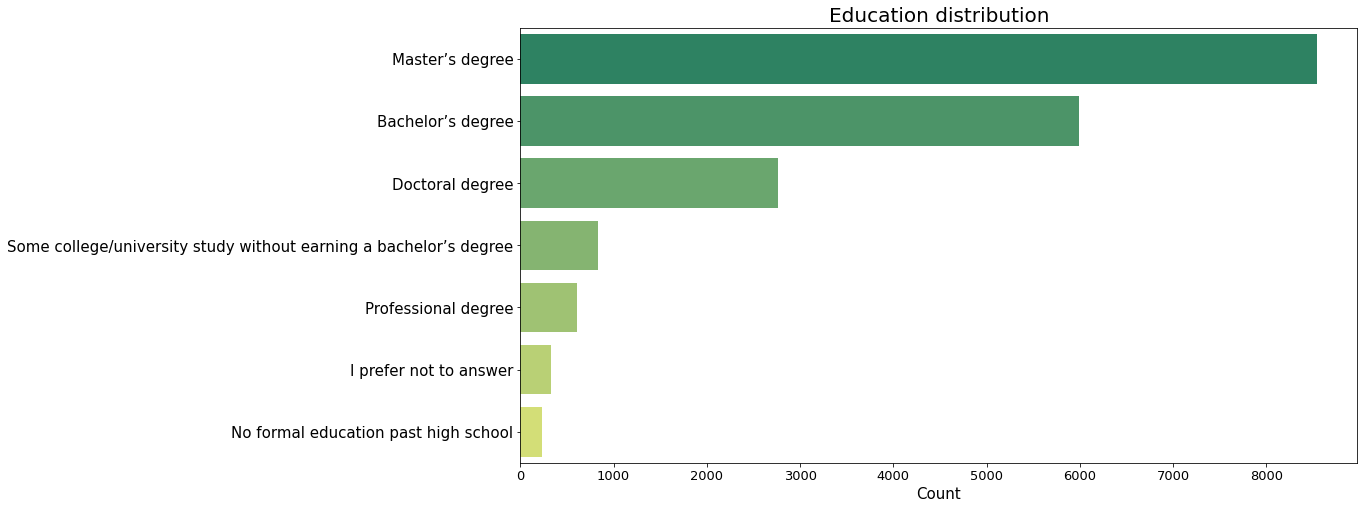

In [13]:
data2 = pd.DataFrame(data.iloc[1:]['Q4'].value_counts().sort_values(ascending=False)).reset_index().head(25)
data2.head()
plt.figure(figsize=(15,8))
vis4 = sns.barplot(y=data2['index'], x=data2.Q4, palette='summer')
plt.xlabel('Count', fontsize=15)
plt.ylabel('', fontsize=15)
plt.xticks(rotation=0, fontsize=13)
plt.yticks(rotation=0, fontsize=15)
plt.title('Education distribution', fontsize=20)

# for p in vis4.patches:
#     vis4.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
#                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Kaggle's users' jobs**

Text(0.5, 1.0, 'Job of Kaggle users')

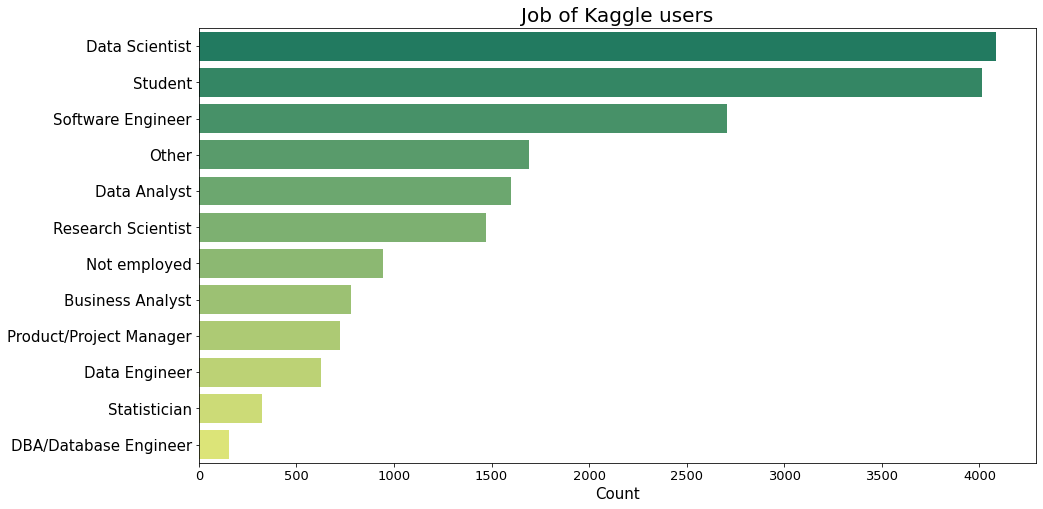

In [14]:
data3 = pd.DataFrame(data.iloc[1:]['Q5'].value_counts().sort_values(ascending=False)).reset_index().head(25)
plt.figure(figsize=(15,8))
sns.barplot(y=data3['index'], x=data3.Q5, palette='summer')
plt.xlabel('Count', fontsize=15)
plt.ylabel('', fontsize=15)
plt.xticks(rotation=0, fontsize=13)
plt.yticks(rotation=0, fontsize=15)
plt.title('Job of Kaggle users', fontsize=20)

In [0]:
data4 = pd.DataFrame(data.loc[1:, 'Q16_Part_1': 'Q16_Part_12']).reset_index()
data4.drop('index', axis=1, inplace=True)
data4.head()
a =pd.DataFrame(pd.value_counts(data4.values.flatten())).reset_index()
a.columns = ['A', 'B']

**Development Environments**

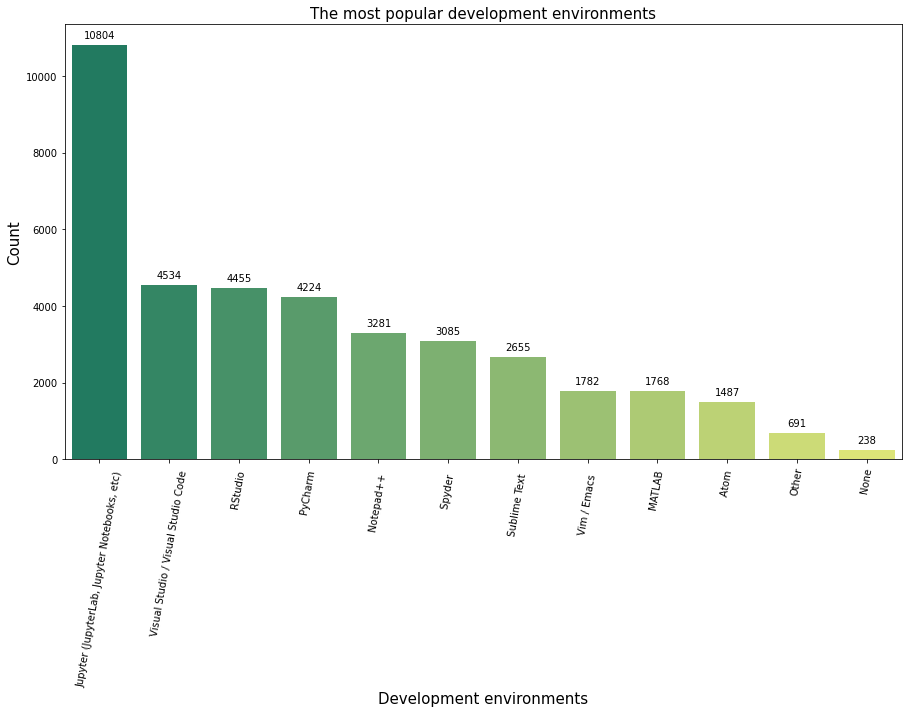

In [16]:
plt.figure(figsize=(15,8))
vis5 = sns.barplot(data=a, x='A', y='B', palette='summer')
plt.xlabel('Development environments', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=80)
plt.title('The most popular development environments', fontsize=15)

for p in vis5.patches:
    vis5.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Notebook products**

In [0]:
data5 = pd.DataFrame(data.loc[1:, 'Q17_Part_1': 'Q17_Part_12']).reset_index()
data5.drop('index', axis=1, inplace=True)
data55 =pd.DataFrame(pd.value_counts(data5.values.flatten())).reset_index()
data55.columns = ['A', 'B']

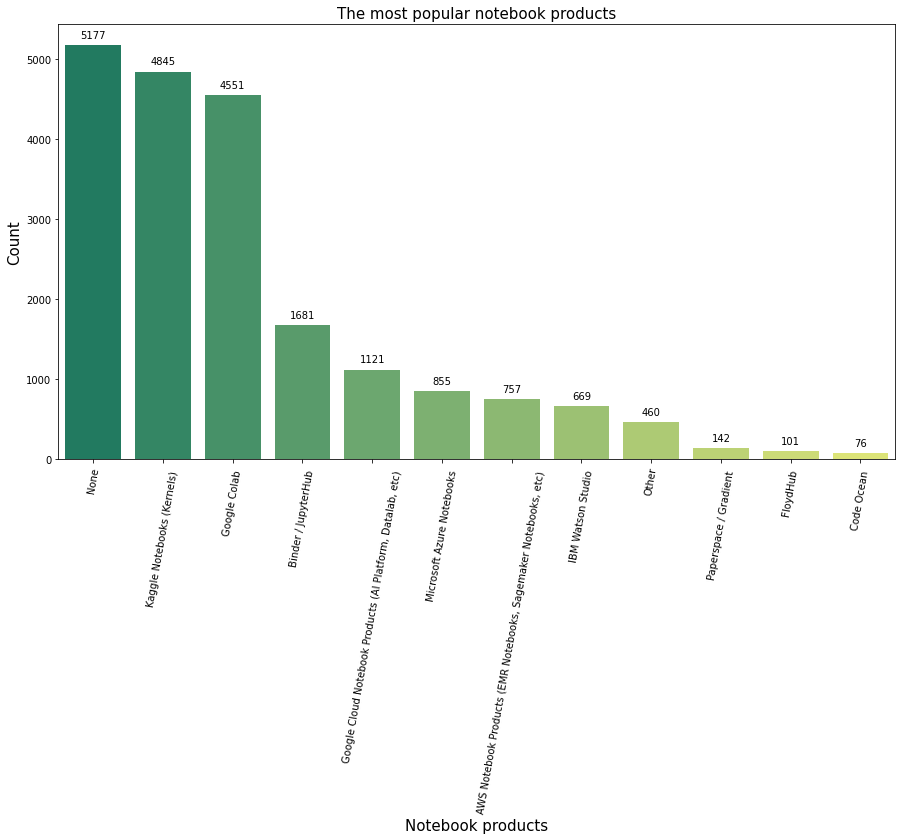

In [18]:
plt.figure(figsize=(15,8))
vis6 = sns.barplot(data=data55, x='A', y='B', palette='summer')
plt.xlabel('Notebook products', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=80)
plt.title('The most popular notebook products', fontsize=15)

for p in vis6.patches:
    vis6.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Programming language**

In [0]:
data6 = pd.DataFrame(data.loc[1:, 'Q18_Part_1': 'Q18_Part_12']).reset_index()
data6.drop('index', axis=1, inplace=True)
data66 = pd.DataFrame(pd.value_counts(data6.values.flatten())).reset_index()
data66.columns = ['A', 'B']

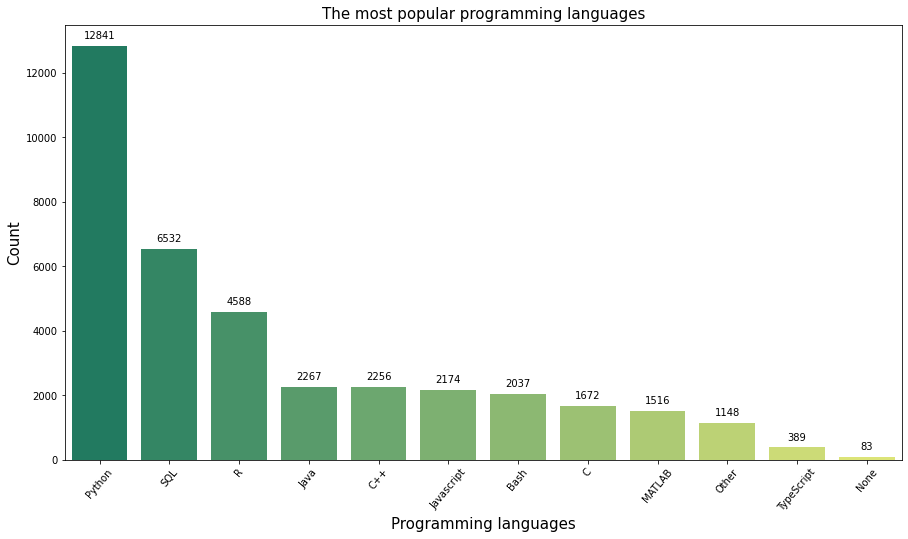

In [20]:
plt.figure(figsize=(15,8))
vis7 = sns.barplot(data=data66, x='A', y='B', palette='summer')
plt.xlabel('Programming languages', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=50)
plt.title('The most popular programming languages', fontsize=15)

for p in vis7.patches:
    vis7.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Data visualisation methods, tools**

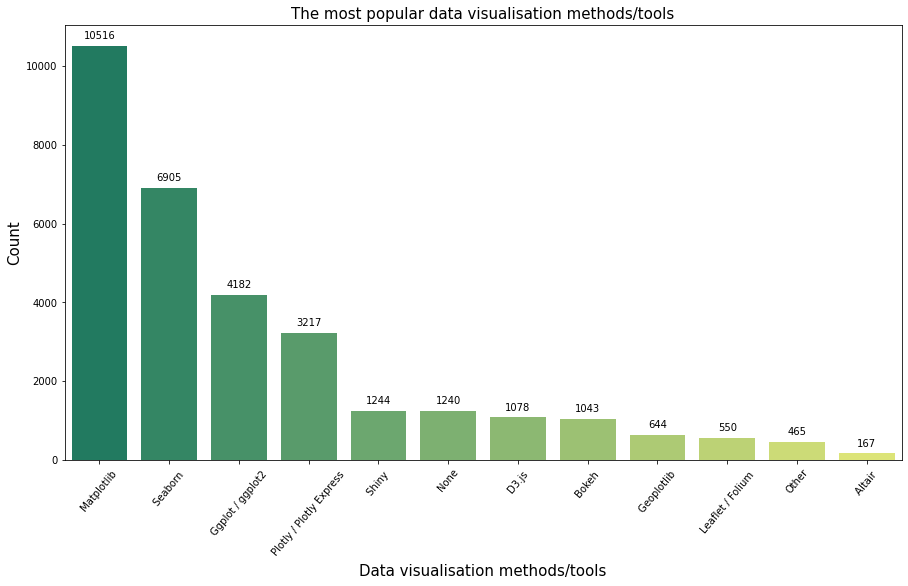

In [21]:
data8 = pd.DataFrame(data.loc[1:, 'Q20_Part_1': 'Q20_Part_12']).reset_index()
data8.drop('index', axis=1, inplace=True)
data8.head()

data88 =pd.DataFrame(pd.value_counts(data8.values.flatten())).reset_index()
data88.columns = ['A', 'B']
data88.head(5)

plt.figure(figsize=(15,8))
vis8 = sns.barplot(data=data88, x='A', y='B', palette='summer')
plt.xlabel('Data visualisation methods/tools', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=50)
plt.title('The most popular data visualisation methods/tools', fontsize=15)

for p in vis8.patches:
    vis8.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Machine Learning algorithms**

In [0]:
data9 = pd.DataFrame(data.loc[1:, 'Q24_Part_1': 'Q24_Part_12']).reset_index()
data9.drop('index', axis=1, inplace=True)

data99 =pd.DataFrame(pd.value_counts(data9.values.flatten())).reset_index()
data99.columns = ['A', 'B']

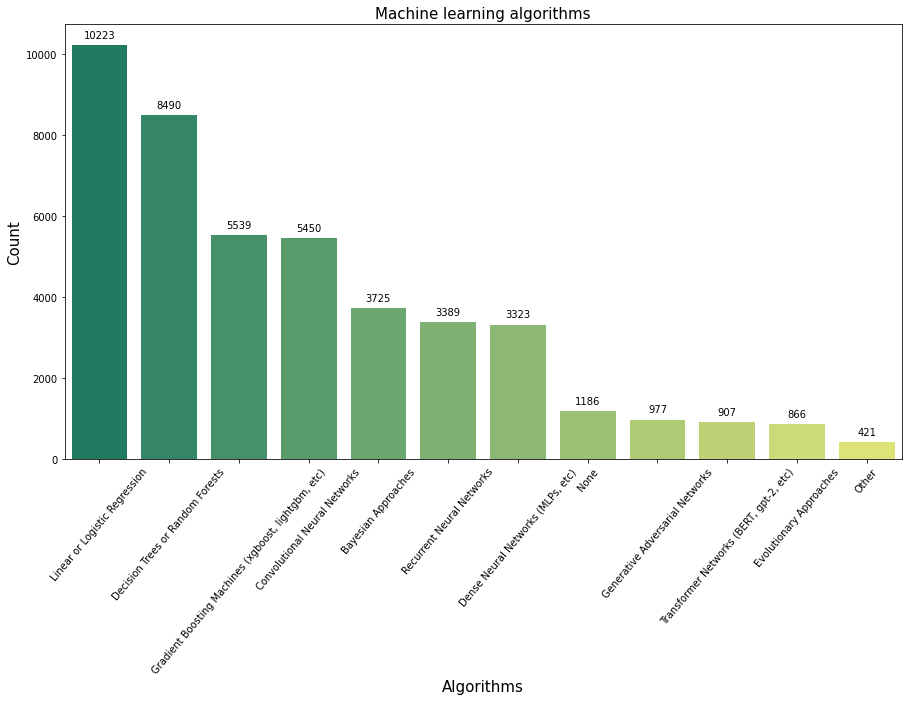

In [23]:
plt.figure(figsize=(15,8))
vis9 = sns.barplot(data=data99, x='A', y='B', palette='summer')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=50)
plt.title('Machine learning algorithms', fontsize=15)

for p in vis9.patches:
    vis9.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Machine Learning Tools**

In [0]:
data10 = pd.DataFrame(data.loc[1:, 'Q25_Part_1': 'Q25_Part_7']).reset_index()
data10.drop('index', axis=1, inplace=True)

data100 =pd.DataFrame(pd.value_counts(data10.values.flatten())).reset_index()
data100.columns = ['A', 'B']

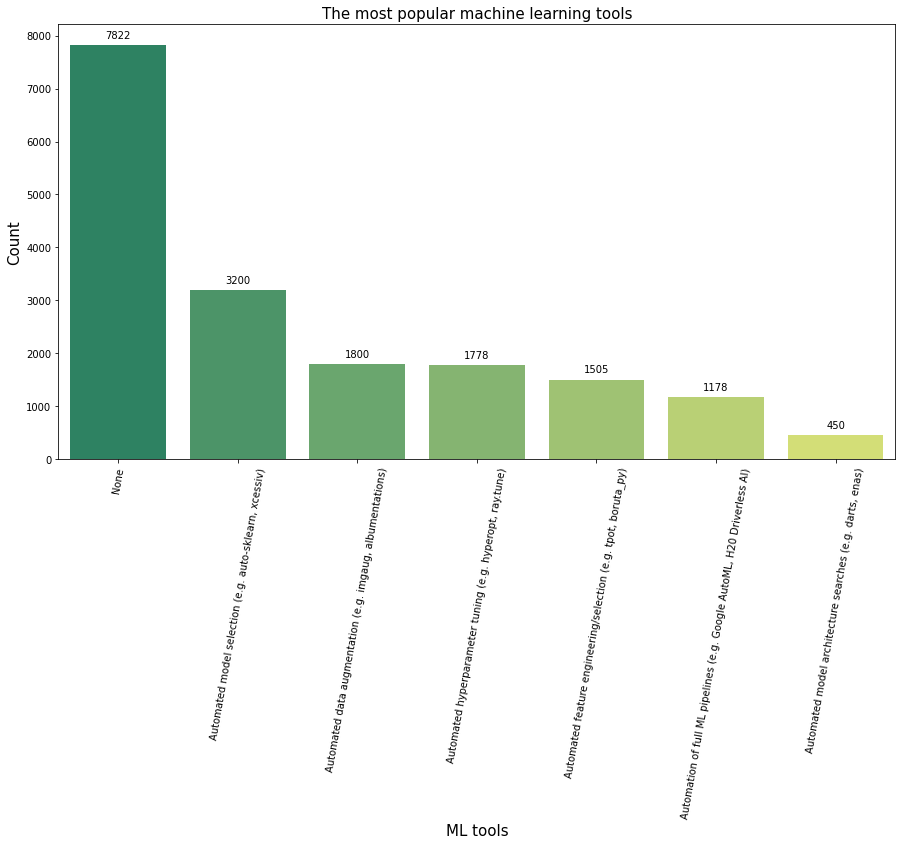

In [25]:
plt.figure(figsize=(15,8))
vis10 = sns.barplot(data=data100, x='A', y='B', palette='summer')
plt.xlabel('ML tools', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=80)
plt.title('The most popular machine learning tools', fontsize=15)

for p in vis10.patches:
    vis10.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Computer Vision Methods**

In [0]:
data11 = pd.DataFrame(data.loc[1:, 'Q26_Part_1': 'Q26_Part_7']).reset_index()
data11.drop('index', axis=1, inplace=True)

data111 =pd.DataFrame(pd.value_counts(data11.values.flatten())).reset_index()
data111.columns = ['A', 'B']

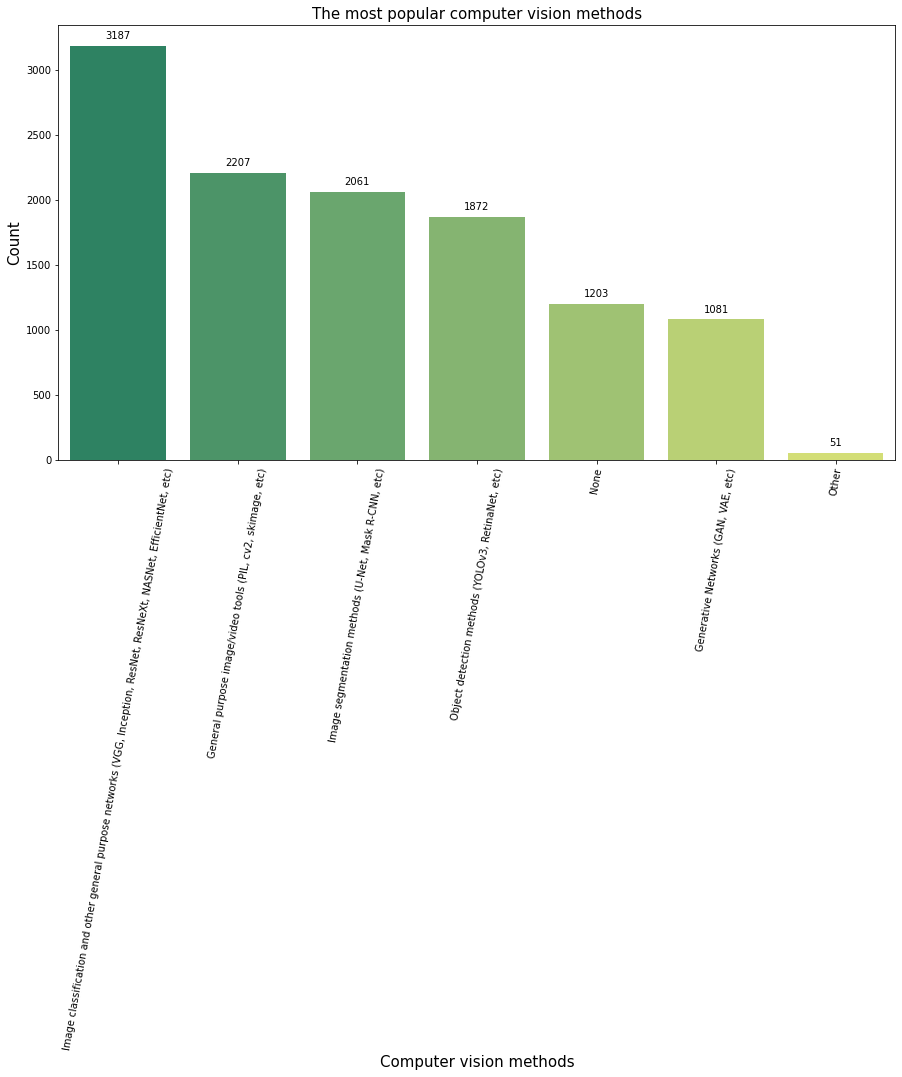

In [27]:
plt.figure(figsize=(15,8))
vis11 = sns.barplot(data=data111, x='A', y='B', palette='summer')
plt.xlabel('Computer vision methods', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=80)
plt.title('The most popular computer vision methods', fontsize=15)

for p in vis11.patches:
    vis11.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Natural Language Processing Methods**

In [0]:
data12 = pd.DataFrame(data.loc[1:, 'Q27_Part_1': 'Q27_Part_6']).reset_index()
data12.drop('index', axis=1, inplace=True)

data122 =pd.DataFrame(pd.value_counts(data12.values.flatten())).reset_index()
data122.columns = ['A', 'B']

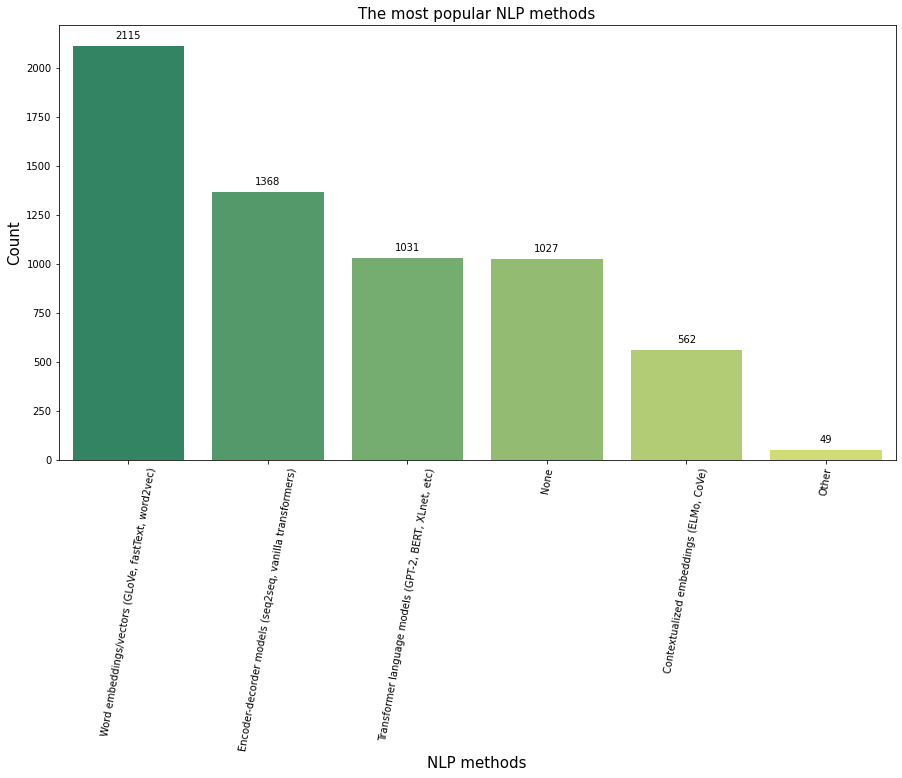

In [29]:
plt.figure(figsize=(15,8))
vis12 = sns.barplot(data=data122, x='A', y='B', palette='summer')
plt.xlabel('NLP methods', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=80)
plt.title('The most popular NLP methods', fontsize=15)

for p in vis12.patches:
    vis12.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Machine learning frameworks**

In [0]:
data13 = pd.DataFrame(data.loc[1:, 'Q28_Part_1': 'Q28_Part_12']).reset_index()
data13.drop('index', axis=1, inplace=True)

data133 =pd.DataFrame(pd.value_counts(data13.values.flatten())).reset_index()
data133.columns = ['A', 'B']

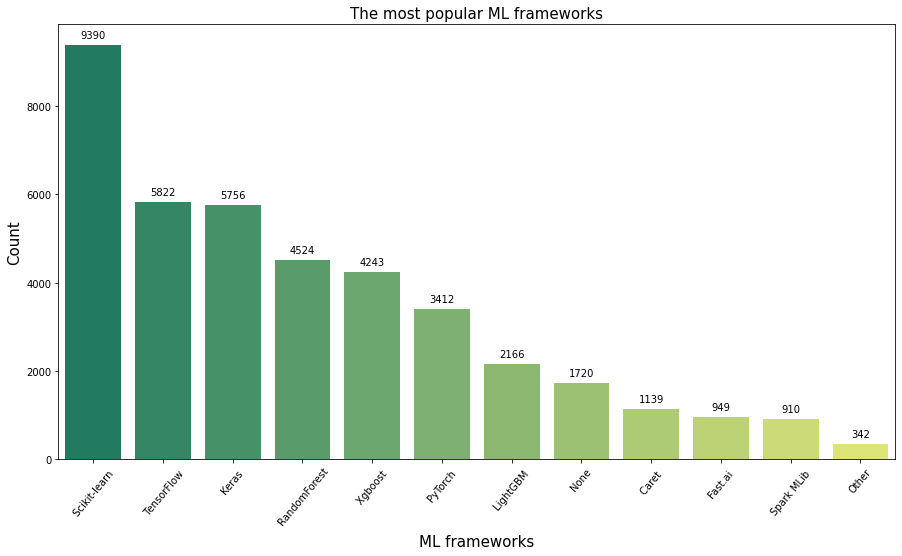

In [31]:
plt.figure(figsize=(15,8))
vis13 = sns.barplot(data=data133, x='A', y='B', palette='summer')
plt.xlabel('ML frameworks', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=50)
plt.title('The most popular ML frameworks', fontsize=15)

for p in vis13.patches:
    vis13.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Machine learning products**

In [0]:
data17 = pd.DataFrame(data.loc[1:, 'Q32_Part_1': 'Q32_Part_12']).reset_index()
data17.drop('index', axis=1, inplace=True)

data177 =pd.DataFrame(pd.value_counts(data17.values.flatten())).reset_index()
data177.columns = ['A', 'B']

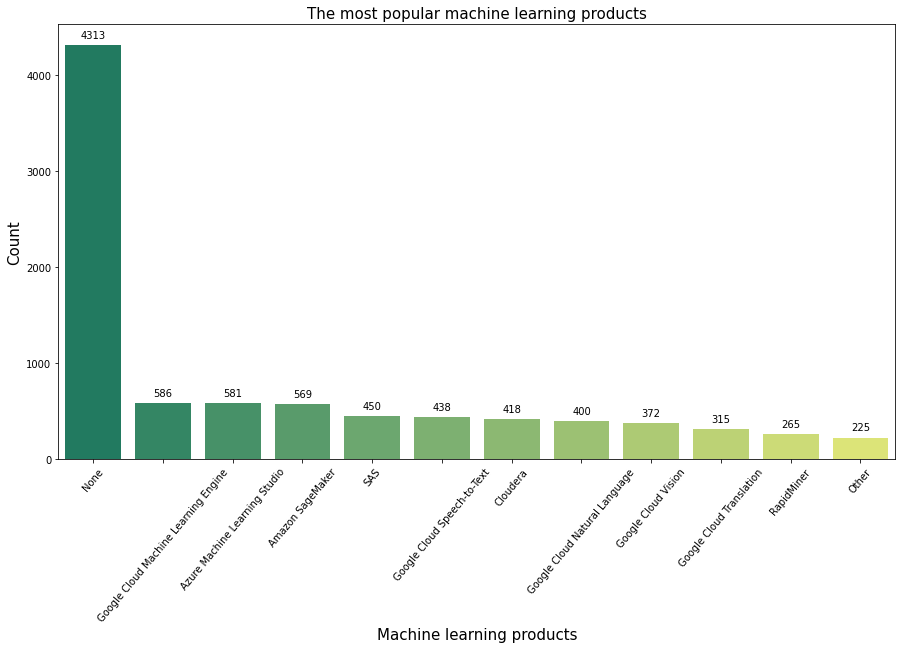

In [33]:
plt.figure(figsize=(15,8))
vis17 = sns.barplot(data=data177, x='A', y='B', palette='summer')
plt.xlabel('Machine learning products', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=50)
plt.title('The most popular machine learning products', fontsize=15)

for p in vis17.patches:
    vis17.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


**Cloud platforms**

In [0]:
data14 = pd.DataFrame(data.loc[1:, 'Q29_Part_1': 'Q29_Part_12']).reset_index()
data14.drop('index', axis=1, inplace=True)

data144 =pd.DataFrame(pd.value_counts(data14.values.flatten())).reset_index()
data144.columns = ['A', 'B']

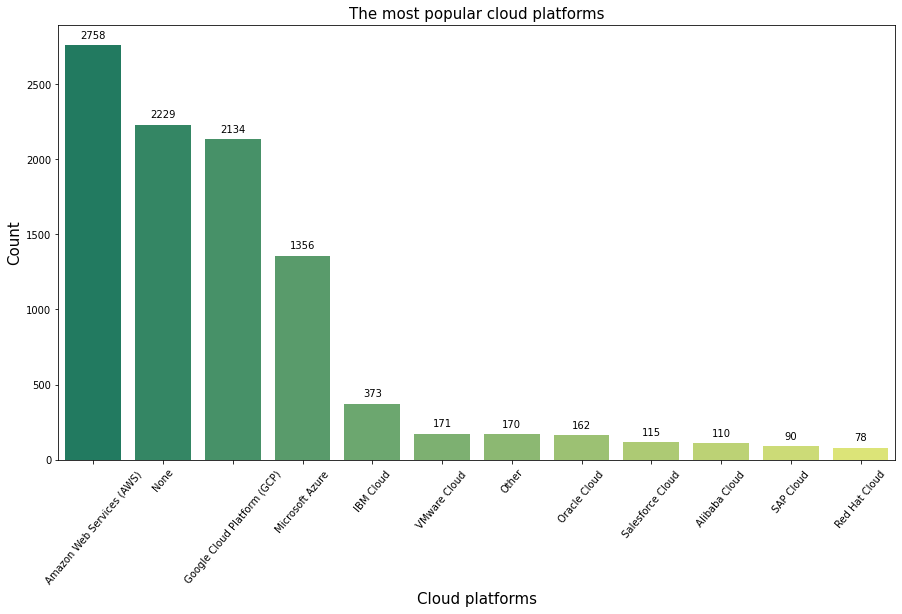

In [35]:
plt.figure(figsize=(15,8))
vis14 = sns.barplot(data=data144, x='A', y='B', palette='summer')
plt.xlabel('Cloud platforms', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=50)
plt.title('The most popular cloud platforms', fontsize=15)

for p in vis14.patches:
    vis14.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Specified cloud platforms**

In [0]:
data15 = pd.DataFrame(data.loc[1:, 'Q30_Part_1': 'Q30_Part_12']).reset_index()
data15.drop('index', axis=1, inplace=True)

data155 =pd.DataFrame(pd.value_counts(data15.values.flatten())).reset_index()
data155.columns = ['A', 'B']

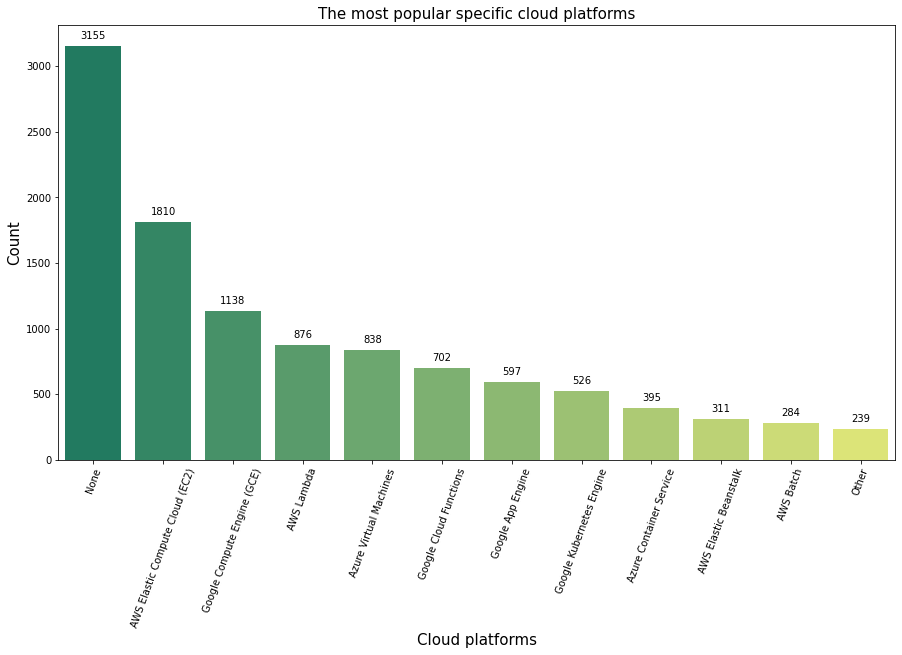

In [37]:
plt.figure(figsize=(15,8))
vis15 = sns.barplot(data=data155, x='A', y='B', palette='summer')
plt.xlabel('Cloud platforms', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=70)
plt.title('The most popular specific cloud platforms', fontsize=15)

for p in vis15.patches:
    vis15.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Specific Big Data Products**

In [0]:
data16 = pd.DataFrame(data.loc[1:, 'Q31_Part_1': 'Q31_Part_12']).reset_index()
data16.drop('index', axis=1, inplace=True)

data166 =pd.DataFrame(pd.value_counts(data16.values.flatten())).reset_index()
data166.columns = ['A', 'B']

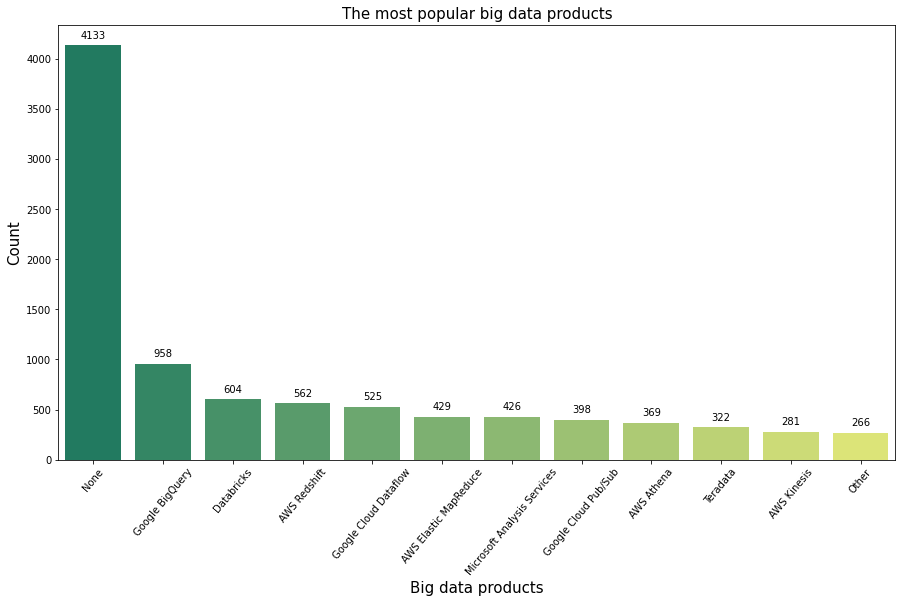

In [39]:
plt.figure(figsize=(15,8))
vis16 = sns.barplot(data=data166, x='A', y='B', palette='summer')
plt.xlabel('Big data products', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=50)
plt.title('The most popular big data products', fontsize=15)

for p in vis16.patches:
    vis16.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Relational databases products**

In [0]:
data18 = pd.DataFrame(data.loc[1:, 'Q34_Part_1': 'Q34_Part_12']).reset_index()
data18.drop('index', axis=1, inplace=True)

data188 =pd.DataFrame(pd.value_counts(data18.values.flatten())).reset_index()
data188.columns = ['A', 'B']

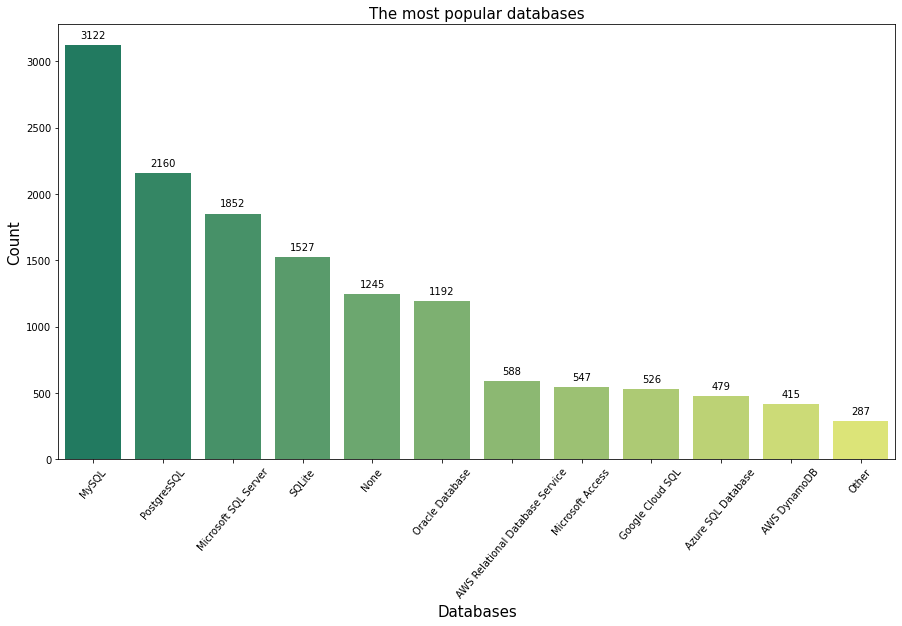

In [41]:
plt.figure(figsize=(15,8))
vis18 = sns.barplot(data=data188, x='A', y='B', palette='summer')
plt.xlabel('Databases', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=50)
plt.title('The most popular databases', fontsize=15)

for p in vis18.patches:
    vis18.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

What aspiring Data Scientist should learn and master?

BASICS: evelopment environments, visualisations, programming language

Development environments:

- Jupyter - Notebook, Lab
- Visual Studio
- RStudio
- Pycharm 

The most popular is Jupyter and it can be chosen as the first one.

Notebook products:

- Kaggle kernels
- Google Colab
- Binder, JupyterHUB Probably the best option to create own portfolio is having Kaggle profile

Programming language:

- Python
- SQL
- R
- Java Python should be the first choose to starts adventure as data scientist.

Data visualisation methods, tools

-Matplotlib
-Seaborn
-Ggplot
- Plotly Here are the best visualisation tools to create charts.

**MACHINE LEARNING**

Machine Learning algorithms:

- Linear and Logistic Regressions
- Decision Trees and Random Forests
- Gradient Boosting
- Neural networks
--Bayesian The most popular and every data siecntist has to know.

Machine learning tools:

- Automated model selection - sklearn
- Imguag, albumentation

Computer vision methods:

- Image classification - VGC, Inception
- General purpose tools
- Image segmentation - U-Net, Mask

Natural Language Processing Methods:

- Word embeddings - GLoVe, fastText
- Encoder-decodedr models - seq2seq, vanilla transformers
- Transformer language methods - GPT-2, BERT

Machine Learning frameworks:

- Scikit-Learn
- Tensorflow
- Keras
- RandomoForest Scikit learn and tensorflow are the most popular and we have to know them.

Machine learning products:

- Google cloud machine learning engine
- Azure Machine learning studio
- Amazon SageMaker
- SAS

**CLOUD PLATFORMS**

Cloud platforms:

- AWS
- Google Cloud
- Microsoft Azure

Specific cloud platform products:

- None
- AWS Elastic Search
- Google Compute Engine
- AWS Lambda

**BIG DATA DATABASES**

Big Data products:

- Google Big Query
- Databricks
- AWS Redshift
- Google Cloud Dataflow

**BIG DATA DATABASES**

Databases:

- MySQL
- PostgresSQL
- Microsoft SQL Server
- SQLite